Import the necessary python libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

load the dataset into pandas dataframe

In [3]:
df=pd.read_csv('amazon_prime_titles.csv')

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [7]:
df.shape

(9668, 12)

In [8]:
df.isnull().any()

,0
show_id,False
type,False
title,False
director,True
cast,True
country,True
date_added,True
release_year,False
rating,True
duration,False


In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2083
cast,1233
country,8996
date_added,9513
release_year,0
rating,337
duration,0


In [69]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      show_id   type                title       director  \
0         s1  Movie  The Grand Seduction   Don McKellar   
0         s1  Movie  The Grand Seduction   Don McKellar   
0         s1  Movie  The Grand Seduction   Don McKellar   
0         s1  Movie  The Grand Seduction   Don McKellar   
0         s1  Movie  The Grand Seduction   Don McKellar   
...      ...    ...                  ...            ...   
9667   s9668  Movie          Harry Brown  Daniel Barber   
9667   s9668  Movie          Harry Brown  Daniel Barber   
9667   s9668  Movie          Harry Brown  Daniel Barber   
9667   s9668  Movie          Harry Brown  Daniel Barber   
9667   s9668  Movie          Harry Brown  Daniel Barber   

                                                   cast  country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent   Canada   
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent   Canada   
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent   Canada   
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent   Canada   
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent   Canada   
...                                                 ...      ...   
9667  Michael Caine, Emily Mortimer, Joseph Gilgun, ...  Unknown   
9667  Michael Caine, Emily Mortimer, Joseph Gilgun, ...  Unknown   
9667  Michael Caine, Emily Mortimer, Joseph Gilgun, ...  Unknown   
9667  Michael Caine, Emily Mortimer, Joseph Gilgun, ...  Unknown   
9667  Michael Caine, Emily Mortimer, Joseph Gilgun, ...  Unknown   

          date_added  release_year rating duration                listed_in  \
0     March 30, 2021          2014    13+  113 min            Comedy, Drama   
0     March 30, 2021          2014    13+  113 min            Comedy, Drama   
0     March 30, 2021          2014    13+  113 min            Comedy, Drama   
0     March 30, 2021          2014    13+  113 min            Comedy, Drama   
0     March 30, 2021          2014    13+  113 min            Comedy, Drama   
...              ...           ...    ...      ...                      ...   
9667         Unknown          2010      R  103 min  Action, Drama, Suspense   
9667         Unknown          2010      R  103 min  Action, Drama, Suspense   
9667         Unknown          2010      R  103 min  Action, Drama, Suspense   
9667         Unknown          2010      R  103 min  Action, Drama, Suspense   
9667         Unknown          2010      R  103 min  Action, Drama, Suspense   

                                            description decade  
0     A small fishing village must procure a local d...   2010  
0     A small fishing village must procure a local d...   2010  
0     A small fishing village must procure a local d...   2010  
0     A small fishing village must procure a local d...   2010  
0     A small fishing village must procure a local d...   2010  
...                                                 ...    ...  
9667  Harry Brown, starring two-time Academy Award w...   2010  
9667  Harry Brown, starring two-time Academy Award w...   2010  
9667  Harry Brown, starring two-time Academy Award w...   2010  
9667  Harry Brown, starring two-time Academy Award w...   2010  
9667  Harry Brown, starring two-time Academy Award w...   2010  

[425705 rows x 13 columns]>

In [10]:
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)
df['director'].fillna('Unknown',inplace=True)
df['date_added'].fillna('Unknown',inplace=True)

In [11]:
#use mode for categorical value otherwise use mean
mode_value = df['rating'].mode()[0]
df['rating'].fillna(mode_value, inplace=True)

In [12]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",Unknown,Unknown,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",Unknown,Unknown,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Unknown,Unknown,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",Unknown,Unknown,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [14]:
total_shows=df['show_id'].count()
total_shows #This also the total number of titles

9668

In [15]:
show_types=df['type'].value_counts()
show_types

,count
type,
Movie,7814
TV Show,1854


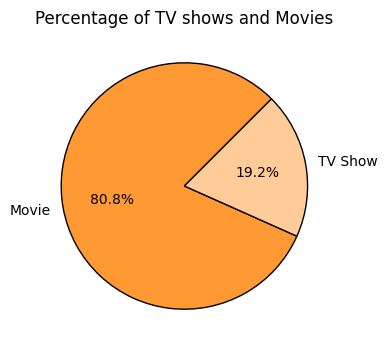

In [109]:
plt.figure(figsize=(4,4))
plt.pie(show_types,labels=show_types.index,colors=['#FF9933','#FFCC99'],autopct='%1.1f%%',startangle=45,wedgeprops={'edgecolor': 'black','linewidth':1})
plt.title('Percentage of TV shows and Movies')
plt.show()

In [17]:
#total number of countries
total_countries=df['country'].nunique()
total_countries

87

In [18]:
df['country'].value_counts().head(5)

,count
country,
Unknown,8996
United States,253
India,229
United Kingdom,28
Canada,16


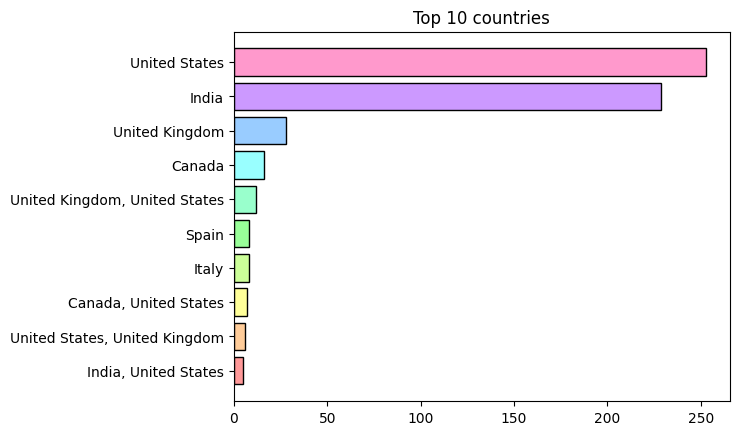

In [19]:
#Top 10 countries except Unknown
x=df['country'].value_counts().keys()[1:11]
y=df['country'].value_counts()[1:11]
plt.barh(x[::-1],y[::-1],color=['#FF9999','#FFCC99','#FFFF99','#CCFF99','#99FF99','#99FFCC','#99FFFF','#99CCFF','#CC99FF','#FF99CC'],edgecolor='black')
plt.title('Top 10 countries')
plt.show()

In [20]:
#Total types of rating
df['rating'].nunique()

24

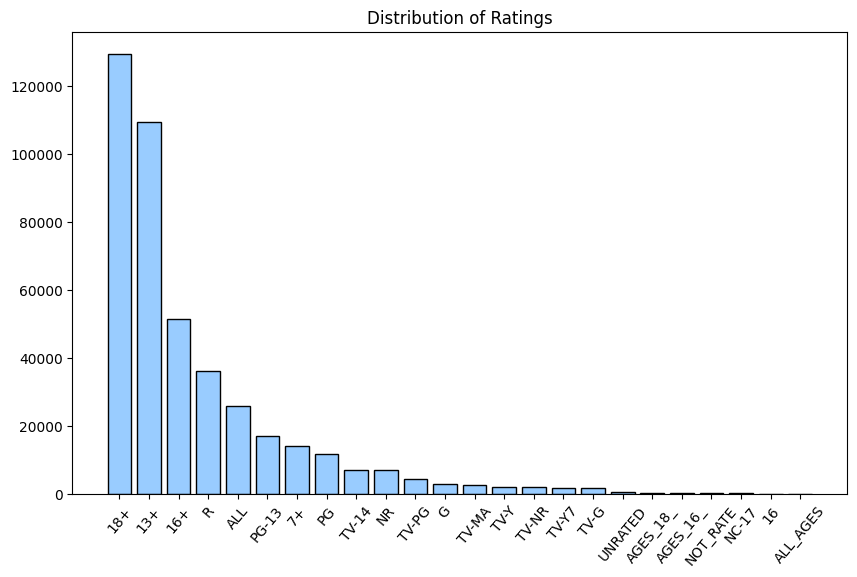

In [91]:
#Bar chart of Distribution of Ratings
plt.figure(figsize=(10,6))
bars=plt.bar(df['rating'].value_counts().keys(),df['rating'].value_counts(),color='#99CCFF',edgecolor='black')
plt.title('Distribution of Ratings')
plt.xticks(rotation=50)

#for bar in bars:
 #   yval = bar.get_height()
#    plt.scatter(bar.get_x() + bar.get_width() / 2, yval, color='black', s=25, zorder=5)

plt.show()

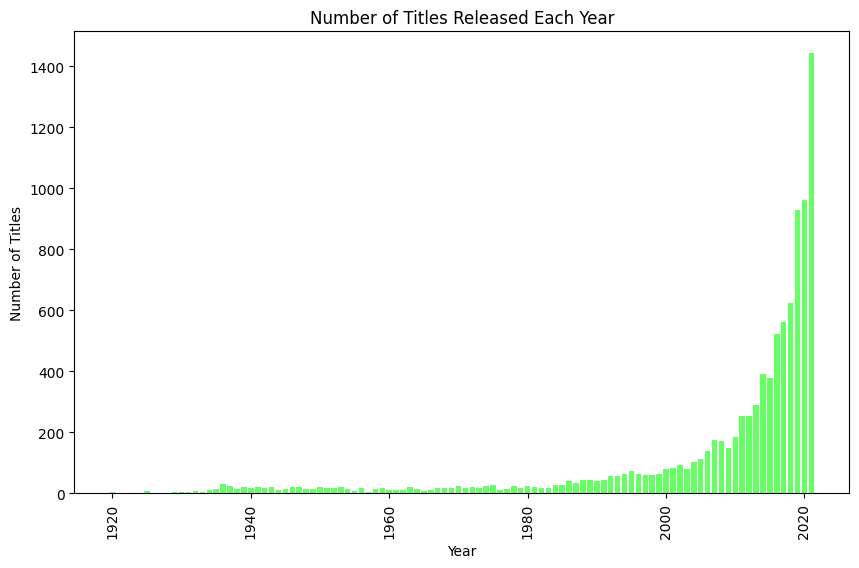

In [22]:
#Bar chart of titles released over the years
plt.figure(figsize=(10,6))
plt.bar(df['release_year'].value_counts().index,df['release_year'].value_counts(),color='#66ff66')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

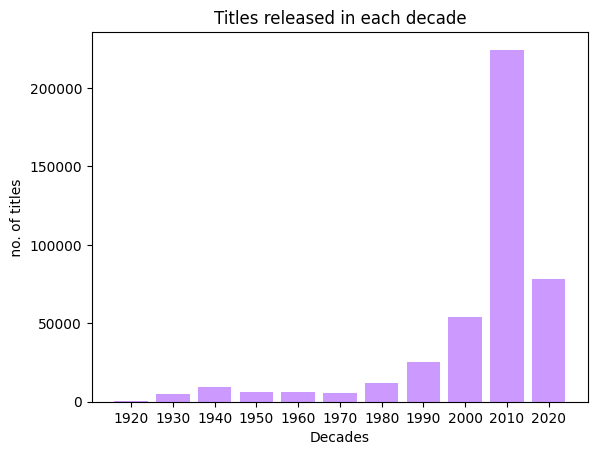

In [68]:
#Titles released each decade
#2005 // 10 computes to 200 and *10 makes it 2000 . Hence grouping it to 2000s
#Appends the character 's' after year like 2000s 2010s
df['decade']=(df['release_year'] // 10 * 10).astype(str)
decade_counts=df['decade'].value_counts().sort_index()
plt.bar(decade_counts.index,decade_counts.values,color='#CC99FF')
plt.xlabel('Decades')
plt.ylabel(' no. of titles ')
plt.title('Titles released in each decade')
plt.show()

In [65]:
df=df.drop(columns=['genre'])

In [70]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,decade
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2010
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2010
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2010
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2010
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",Unknown,Unknown,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w...",2010
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",Unknown,Unknown,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w...",2010
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",Unknown,Unknown,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w...",2010
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",Unknown,Unknown,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w...",2010


In [24]:
df['director'].value_counts().head(10)

,count
director,
Unknown,2083
Mark Knight,113
Cannis Holder,61
Moonbug Entertainment,37
Jay Chapman,34
Arthur van Merwijk,30
Manny Rodriguez,22
John English,20
1,16


In [25]:
 #Use .nunique() to find no.of unique values instead of .unique() which shows all unique names
df['director'].nunique()

5774

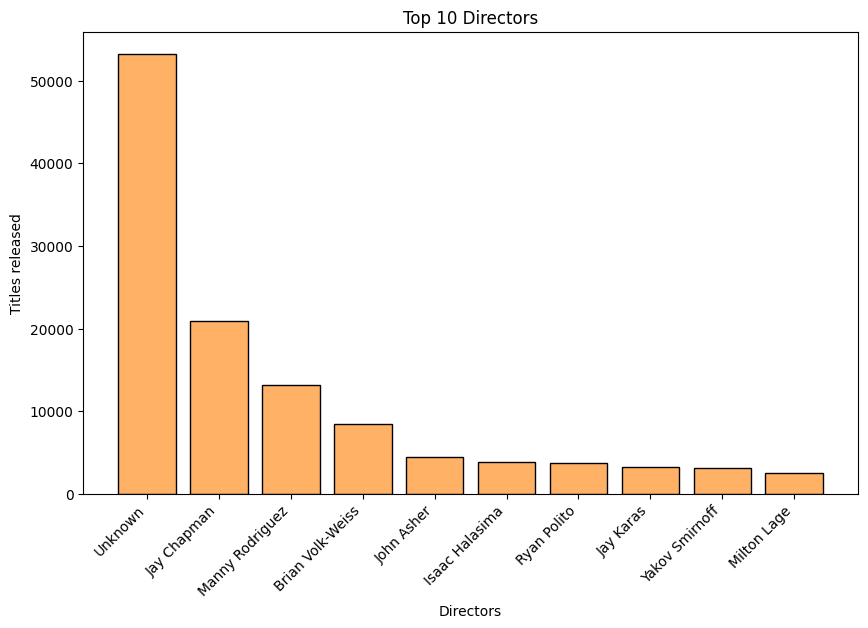

In [93]:
#Top 10 Directors
plt.figure(figsize=(10,6))
plt.bar(df['director'].value_counts().keys()[:10],df['director'].value_counts()[:10],color='#FFB266',edgecolor='black')
plt.title('Top 10 Directors')
plt.xlabel('Directors')
plt.ylabel('Titles released')
plt.xticks(rotation=45,ha='right')
plt.show()

In [48]:
#top 10 genres after splitting data considering ','
#Use lambda to remove spaces before and afer the values
#Use .explode() to create
#all_genres = df['listed_in'].str.split(',').apply(lambda x:[genre.strip() for genre in x]).explode()


In [51]:
all_genres.value_counts().head(5)

,count
listed_in,
Arts,234085
Entertainment,234085
and Culture,234085
Comedy,232432
Special Interest,158654


In [28]:
df['listed_in'].nunique()

518

In [29]:
#Start year in the datset
df['release_year'].min()

1920

In [30]:
#End year in the datset
df['release_year'].max()

2021

In [35]:
df['duration'].value_counts()

,count
duration,
1 Season,1342
2 Seasons,229
90 min,223
91 min,220
92 min,203
...,...
21 Seasons,1
485 min,1
550 min,1


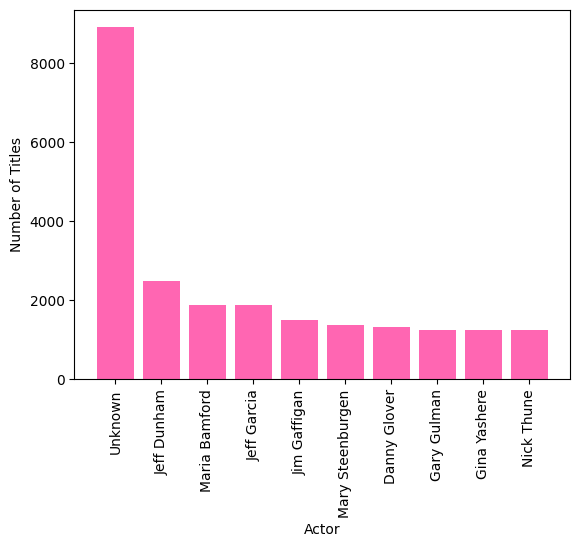

In [83]:
#Reset the index to ensure unique index values. drop=True to discard old index
# ignore_index=True will prevent the error by creating a new index for the exploded column
df = df.reset_index(drop=True)
df['actors']=df['cast'].str.split(',').apply(lambda x: [actor.strip() for actor in x]).explode(ignore_index=True)


plt.bar(df['actors'].value_counts().keys()[:10],df['actors'].value_counts()[:10],color='#ff66b2')
plt.ylabel('Number of Titles')
plt.xlabel('Actor')
plt.xticks(rotation=90)
plt.show()

In [95]:
#TV show durations
# Filter for TV Shows and remove rows with NaN values in the 'duration' column
tv_shows = df[df['type'] == 'TV Show'].dropna(subset=['duration'])

# Get the count of each duration value
duration_counts = tv_shows['duration'].value_counts()


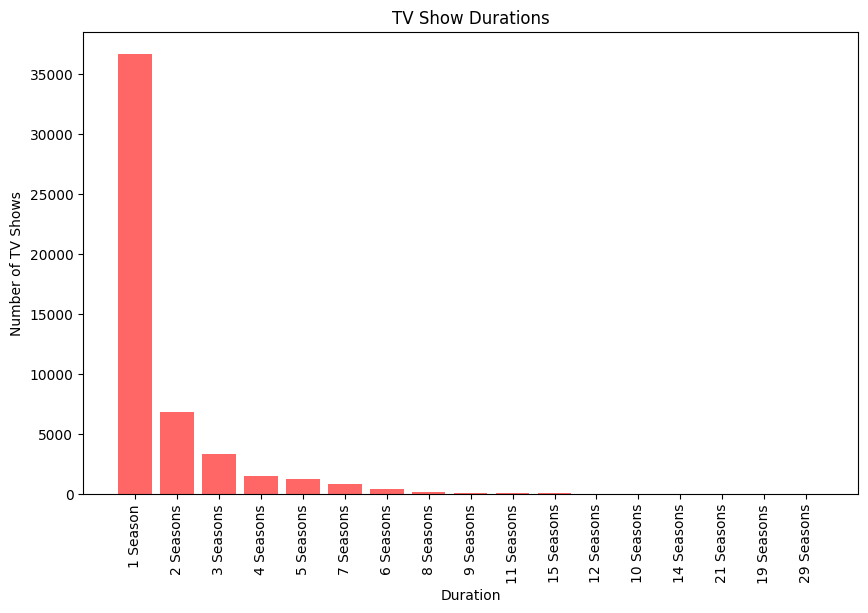

In [97]:
# Plot the distribution of TV Show durations
plt.figure(figsize=(10, 6))
plt.bar(duration_counts.index, duration_counts.values, color='#ff6666')
plt.title('TV Show Durations')
plt.xlabel('Duration')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=90)
plt.show()


In [103]:
# Filter for Movies and remove rows with NaN values in the 'duration' column
movie= df[df['type']=='Movie'].dropna(subset=['duration'])

# Extract numeric duration in minutes from the 'duration' column
movie['duration_minutes']=movie['duration'].str.extract('(\d+)').astype(int)

# Define bins and labels for movie durations
bins = [0, 60, 90, 120, 150, 180, 300]
labels = ['0-60 min', '61-90 min', '91-120 min', '121-150 min', '151-180 min', '180+ min']

# Categorize movies into duration groups
movie['duration_group'] = pd.cut(movie['duration_minutes'], bins=bins, labels=labels)

duration_group_counts = movie['duration_group'].value_counts().sort_index()


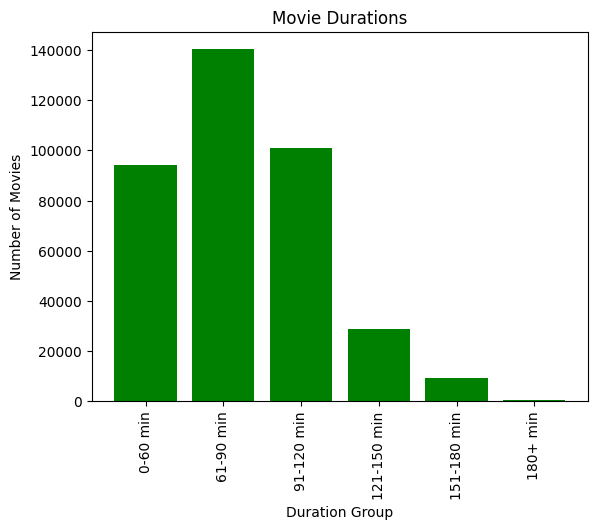

In [108]:
plt.bar(duration_group_counts.index, duration_group_counts.values, color='green')
plt.title('Movie Durations')
plt.xlabel('Duration Group')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()